# RandomForestを利用した特徴の重要度の確認

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

# 前処理

In [3]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna("S")

In [4]:
data = pd.get_dummies(data, columns=["Sex"])
data = pd.get_dummies(data, columns=["Embarked"])

In [5]:
X = data.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = data["Survived"]

### 4-fold cross validation, Grid Search

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf = RandomForestClassifier(n_estimators=100, max_features=3, min_samples_split=10)
scores = cross_val_score(rf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.78571429 0.86098655 0.81981982 0.84684685]
Average score: 0.8283418748665385


In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [10]:
rf.fit(X, y)
feature = rf.feature_importances_

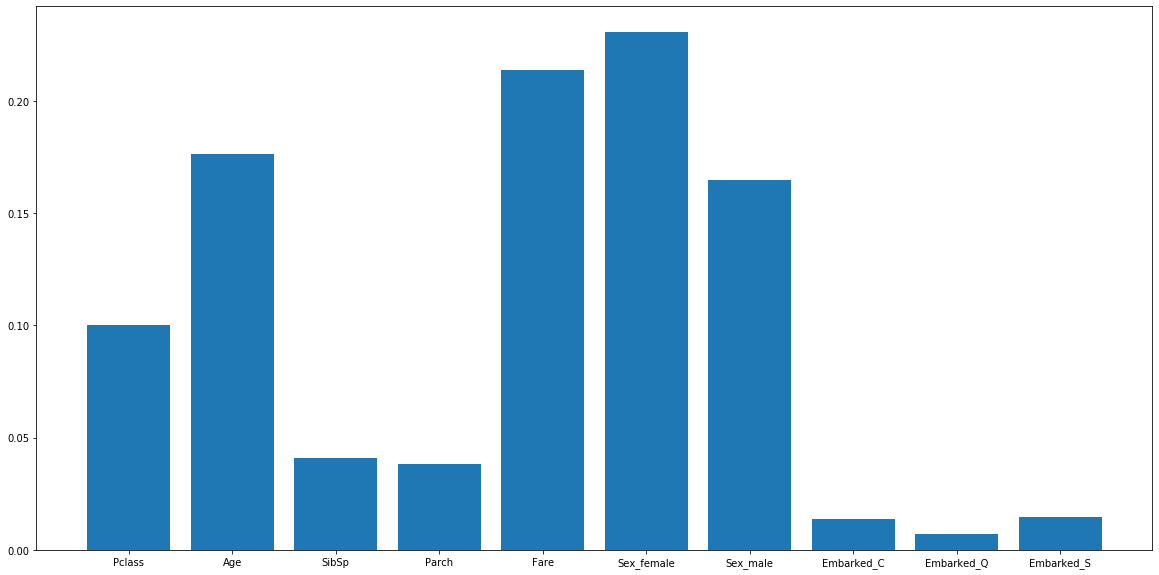

In [11]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature)), feature, tick_label=X.columns)
plt.show()

# ExtraTreesClassifierでもみてみる

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

/Users/y_imagawa/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


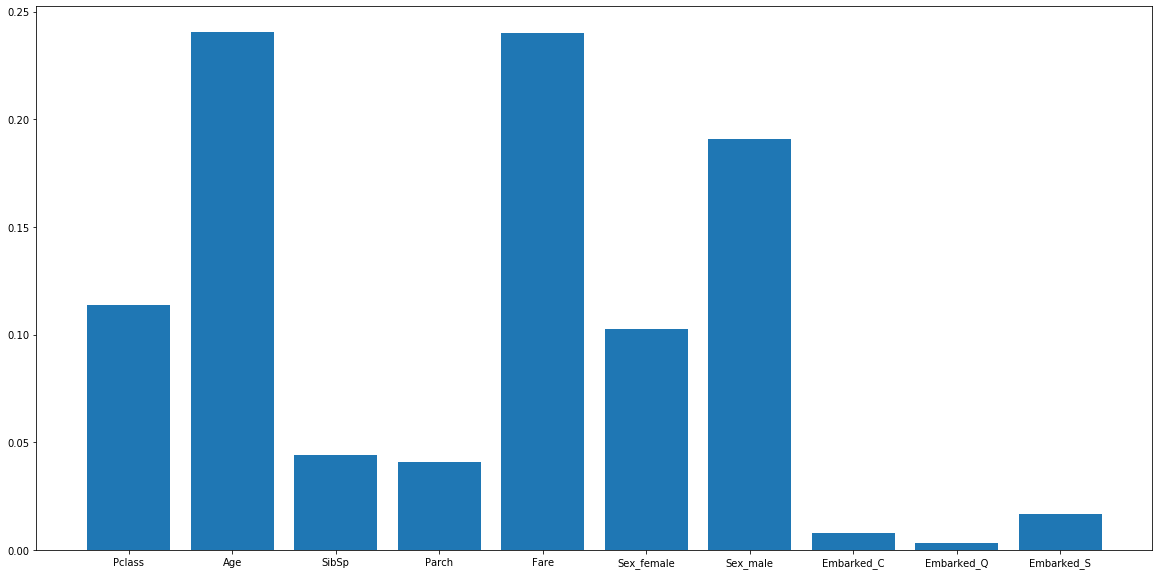

In [13]:
et = ExtraTreesClassifier()
et.fit(X, y)
feature2 = et.feature_importances_
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature2)), feature2, tick_label=X.columns)
plt.show()

### Pclass, Age, Fare, Sexのみを使ってみる

In [14]:
X = X.drop(["SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S"], axis=1)

### Pclassにもワンホットエンコーディングを行うことで、1+2=3などの関係を除去

In [15]:
X = pd.get_dummies(X, columns=["Pclass"])

# Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, max_features=3, min_samples_split=10)
scores = cross_val_score(rf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.77678571 0.86098655 0.83783784 0.85585586]
Average score: 0.8328664887661524


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
def param():
  ret = {
      'C':[0.001, 0.01, 0.1, 1, 10, 100],
  }
  return ret
gscv = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.7901234567901234
Best parameters: {'C': 0.1}


In [20]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, C=0.1)
scores = cross_val_score(lr, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.78125    0.8161435  0.76126126 0.8018018 ]
Average score: 0.7901141402052276


# SVM

In [21]:
from sklearn.svm import SVC

In [22]:
def param():
  ret = {
      'C':[0.001, 0.01, 0.1, 1, 10, 100],
      'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
  }
  return ret
gscv = GridSearchCV(SVC(), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.7833894500561167
Best parameters: {'C': 100, 'gamma': 0.001}


In [23]:
svm = SVC(C=100, gamma=0.001)
scores = cross_val_score(svm, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.76785714 0.80269058 0.75675676 0.80630631]
Average score: 0.7834026972199618


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
def param():
  ret = {
      "max_depth": [2,4,6,8,10],
      "max_features": ['log2', 'sqrt','auto'],
      "min_samples_split": [2, 3, 5],
      "min_samples_leaf": [1,5,8],
      "criterion": ["gini", "entropy"],
  }
  return ret
gscv = GridSearchCV(DecisionTreeClassifier(random_state=0), param(), cv=4)
gscv.fit(X, y)

print('Best score: {}'.format(gscv.best_score_))
print('Best parameters: {}'.format(gscv.best_params_))

Best score: 0.8260381593714927
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=8, max_features="log2", min_samples_split=2)
scores = cross_val_score(dt, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.79464286 0.82959641 0.79279279 0.81981982]
Average score: 0.8092129705778809


# アンサンブル学習(Voting)

In [27]:
from sklearn.ensemble import VotingClassifier

In [ ]:
max_score = 0
for w_lr in range(5):
    for w_svm in range(5):
        for w_dt in range(5):
            for w_rf in range(1, 6):
                vote_clf = VotingClassifier([('lr', lr), ('svm', svm), ('dt', dt), ('rf', rf)], weights=[w_lr, w_svm, w_dt, w_rf])
                scores = cross_val_score(vote_clf, X, y, cv=4)
                tmp_score = np.mean(scores)
                if max_score < tmp_score:
                    max_score = tmp_score
                    print("lr:svm:dt:rf = {}:{}:{}:{}".format(w_lr, w_svm, w_dt, w_rf))
                    print("tmp_score = {}".format(tmp_score))
                    print()
print("Test set score: {:.3f}".format(max_score))
print()

In [31]:
vote_clf =  VotingClassifier([('lr', lr), ('svm', svm), ('dt', dt), ('rf', rf)], weights=[1, 3, 3, 5])
scores = cross_val_score(vote_clf, X, y, cv=4)
print("Cross-Validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))

Cross-Validation scores: [0.81696429 0.85201794 0.8018018  0.83333333]
Average score: 0.8260293395172881


In [32]:
vote_clf.fit(X, y)
print()

# 提出用ファイルを作成

In [33]:
test = pd.read_csv("test.csv")

In [34]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test = pd.get_dummies(test, columns=["Sex"])
test = pd.get_dummies(test, columns=["Pclass"])

In [35]:
X_test = test.drop(["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch", "Embarked"], axis=1)

### 予測結果

In [36]:
X_test.head()

,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,7.8292,0,1,0,0,1
1,47.0,7.0000,1,0,0,0,1
2,62.0,9.6875,0,1,0,1,0
3,27.0,8.6625,0,1,0,0,1
4,22.0,12.2875,1,0,0,0,1


In [37]:
X.head()

,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,7.2500,0,1,0,0,1
1,38.0,71.2833,1,0,1,0,0
2,26.0,7.9250,1,0,0,0,1
3,35.0,53.1000,1,0,1,0,0
4,35.0,8.0500,0,1,0,0,1


In [38]:
pred = vote_clf.predict(X_test)

In [39]:
submit = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":pred})

In [40]:
submit.to_csv("gender_submission.csv",index=False)

# 結果

- 77.5%